In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df = pd.read_csv('plant_growth_data.csv')
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [79]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [80]:
print(df.value_counts('Soil_Type'), '\n\n',
df.value_counts('Water_Frequency'), '\n\n',
df.value_counts('Fertilizer_Type'), '\n\n',
df.value_counts('Growth_Milestone'))

Soil_Type
clay     67
sandy    64
loam     62
dtype: int64 

 Water_Frequency
daily        74
bi-weekly    60
weekly       59
dtype: int64 

 Fertilizer_Type
none        74
chemical    65
organic     54
dtype: int64 

 Growth_Milestone
0    97
1    96
dtype: int64


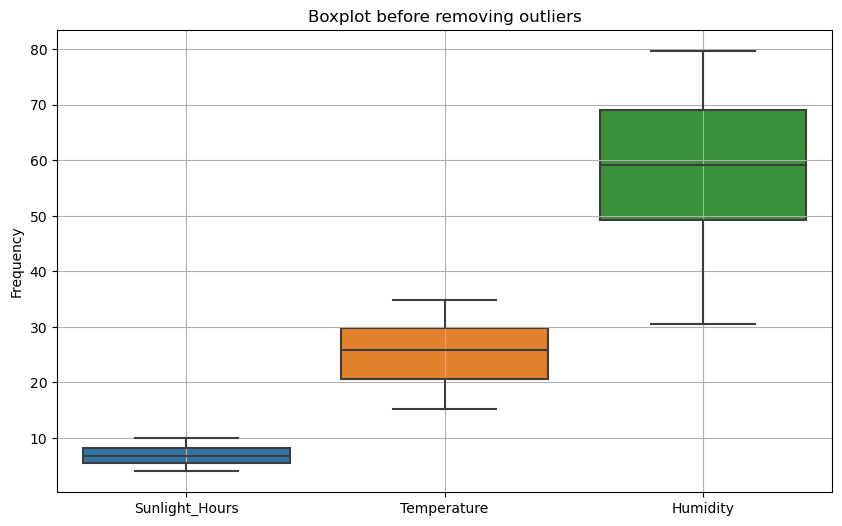

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sunlight_Hours', 'Temperature', 'Humidity']])
plt.title('Boxplot before removing outliers')
plt.ylabel('Frequency')
plt.xticks(range(3), df[['Sunlight_Hours', 'Temperature', 'Humidity']])
plt.grid(True)
plt.show()

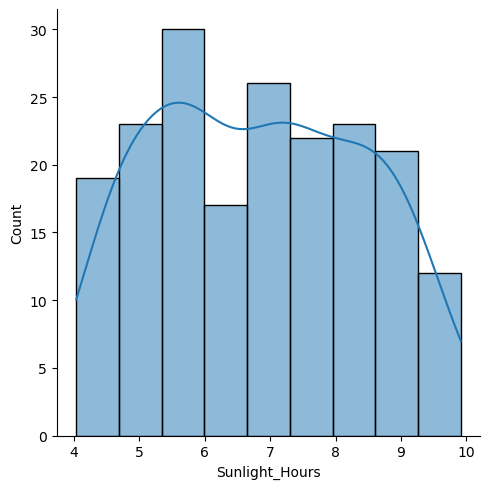

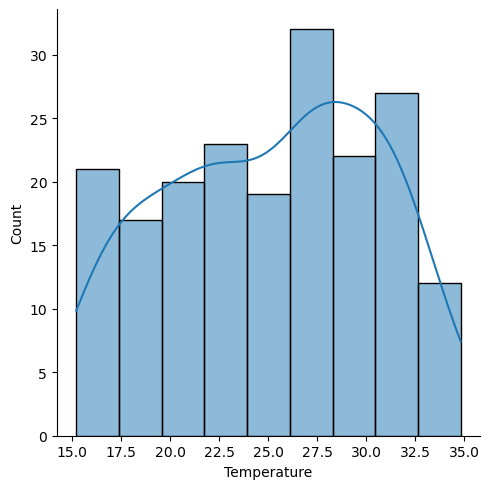

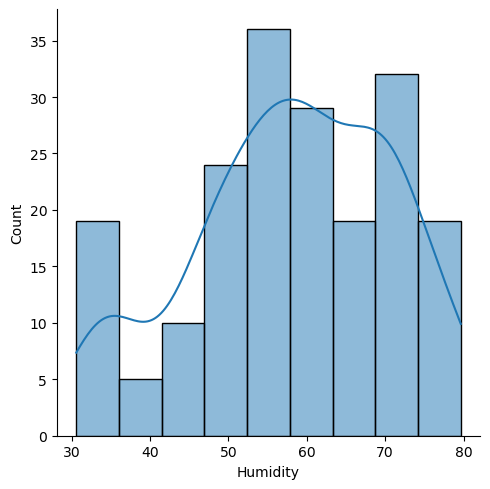

In [82]:
sns.displot(df['Sunlight_Hours'], kde=True)
sns.displot(df['Temperature'], kde=True)
sns.displot(df['Humidity'], kde=True)

In [83]:
for column in ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']:
    df[column] = pd.factorize(df[column])[0] + 1
    
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1,5.192294,1,1,31.719602,61.591861,0
1,2,4.033133,2,2,28.919484,52.422276,1
2,1,8.892769,1,3,23.179059,44.660539,0
3,1,8.241144,1,3,18.465886,46.433227,0
4,2,8.374043,1,2,18.128741,63.625923,0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.iloc[:, :6]
Y = df.iloc[:, 6]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

rf = RandomForestClassifier(
    n_estimators=30,          # Reduce the number of trees
    max_depth=5,              # Limit the maximum depth of trees
    min_samples_split=5,      # Increase minimum samples required to split
    min_samples_leaf=2,       # Increase minimum samples required at leaf node
    max_features='sqrt',      # Limit the number of features considered for splitting
    bootstrap=True            # Use bootstrap samples)
)
rf.fit(X_train, Y_train)

Y_pred_train = rf.predict(X_train)
Y_pred_test = rf.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print('Training Accuracy : ', accuracy_train)
print('Testing Accuracy : ', accuracy_test)

print('\nClassification Report :-\n', classification_report(Y_test, Y_pred_test))
print('\nConfusion Matrix :-\n', confusion_matrix(Y_test, Y_pred_test))

Training Accuracy :  0.8914728682170543
Testing Accuracy :  0.703125

Classification Report :-
               precision    recall  f1-score   support

           0       0.66      0.77      0.71        30
           1       0.76      0.65      0.70        34

    accuracy                           0.70        64
   macro avg       0.71      0.71      0.70        64
weighted avg       0.71      0.70      0.70        64


Confusion Matrix :-
 [[23  7]
 [12 22]]


In [85]:
import pickle

with open('test.pkl', 'wb') as file:
    pickle.dump(rf, file)
    
with open('test.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
prediction = loaded_model.predict(X_test)
print('Testing Accuracy of Loaded_Modedl : ', loaded_model.score(X_test, Y_test))

Testing Accuracy of Loaded_Modedl :  0.703125


In [86]:
df.head(10)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1,5.192294,1,1,31.719602,61.591861,0
1,2,4.033133,2,2,28.919484,52.422276,1
2,1,8.892769,1,3,23.179059,44.660539,0
3,1,8.241144,1,3,18.465886,46.433227,0
4,2,8.374043,1,2,18.128741,63.625923,0
5,2,8.627622,1,3,20.004858,67.618726,0
6,1,4.444268,3,2,25.984533,69.578952,1
7,3,6.150794,3,2,29.291918,69.480907,0
8,1,4.695214,1,3,28.203948,34.560305,1
9,1,9.178621,2,2,20.598678,54.721015,1


In [87]:
# import pickle

# # Load the model
# model = pickle.load(open("D:\\EDA\\PlantGrowth_Predictor v1.0\\test.pkl", "rb"))

# def get_input(prompt):
#     return input(prompt)

# def main():
#     print("Enter the following details to predict plant growth:")

#     soil_type = int(input("Enter Soil Type : "))
#     sunglight_hours = float(input("Enter Sunlight Hours : "))
#     water_frequency = int(input("Enter Water Frequency : "))
#     fertilizer_type = int(input("Enter Fertilizer Type : "))
#     temperature = float(input("Enter Temperature : "))
#     humidity = float(input("Enter Humidity : "))
    
#     prediction = model.predict([[soil_type, sunglight_hours, water_frequency, fertilizer_type, temperature, humidity]])
#     output = round(prediction[0], 2)

#     print(f"Plant Growth Milestone : {output}")

# if __name__ == "__main__":
#     main()